<a href="https://colab.research.google.com/github/amrutask/Machine_Learning/blob/master/HomeWork3/Problem4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-17 23:24:30--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.74.128, 2607:f8b0:4001:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.74.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   198MB/s    in 0.3s    

2019-04-17 23:24:30 (198 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import zipfile
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from keras import backend as K
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras import utils

Using TensorFlow backend.


In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [6]:
from keras.applications import VGG19

conv_base = VGG19(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
from keras import layers
from keras import models
from keras import optimizers

last_layer = conv_base.get_layer('block5_pool')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(conv_base.input, x)
model.summary()

last layer output shape: (None, 4, 4, 512)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (Non

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
# compile model

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 23s 231ms/step - loss: 0.5445 - acc: 0.7215 - val_loss: 0.3783 - val_acc: 0.8170
Epoch 2/30
100/100 [==============================] - 19s 189ms/step - loss: 0.3724 - acc: 0.8370 - val_loss: 0.3923 - val_acc: 0.8280
Epoch 3/30
100/100 [==============================] - 18s 185ms/step - loss: 0.3106 - acc: 0.8740 - val_loss: 0.2680 - val_acc: 0.8820
Epoch 4/30
100/100 [==============================] - 19s 194ms/step - loss: 0.3016 - acc: 0.8710 - val_loss: 0.2876 - val_acc: 0.8880
Epoch 5/30
100/100 [==============================] - 19s 185ms/step - loss: 0.2649 - acc: 0.8860 - val_loss: 0.1864 - val_acc: 0.9280
Epoch 6/30
100/100 [==============================] - 19s 186ms/step - loss: 0.2456 - acc: 0.8870 - val_loss: 0.1949 - val_acc: 0.9230
Epoch 7/30
100/100 [==============================] - 18s 185ms/step - loss: 0.2297 - acc: 0.9030 - val_loss: 0.2336 - val_acc: 0.9120
Epoch 8

In [10]:
val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

Validation loss: 0.1570486240205355
Validation accuracy: 0.9559999930858613


In [11]:
print(validation_cats_dir)

/tmp/cats_and_dogs_filtered/validation/cats


In [12]:
!ls /tmp/cats_and_dogs_filtered/validation/cats | head -3
!ls /tmp/cats_and_dogs_filtered/validation/dogs | head -3

cat.2000.jpg
cat.2001.jpg
cat.2002.jpg
dog.2000.jpg
dog.2001.jpg
dog.2002.jpg


In [0]:
#img_path = '/tmp/cats_and_dogs_filtered/validation/cats/cat.2004.jpg'
img_path = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2001.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255

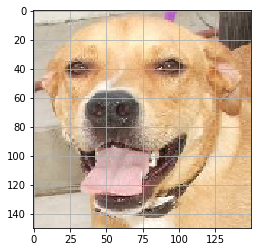

In [14]:
plt.imshow(img_tensor[0])
plt.grid(None)
plt.show()

In [15]:
model.predict(img_tensor)

array([[1.]], dtype=float32)

In [16]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[1:25]]

activation_model = models.Model(input=model.input, outputs=layer_outputs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("in...)`
  """


In [0]:
activations = activation_model.predict(img_tensor)

In [46]:
len(activations)
img_tensor.shape

(1, 150, 150, 3)

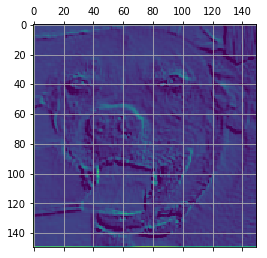

In [18]:
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.grid(None)
plt.show()

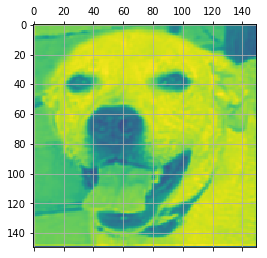

In [19]:
second_layer_activation = activations[1]
plt.matshow(second_layer_activation[0, :, :, 4], cmap='viridis')
plt.grid(None)
plt.show()

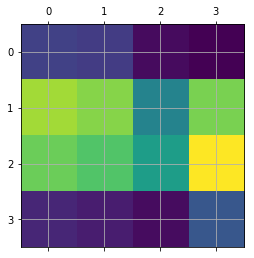

In [20]:
lastconv_layer_activation = activations[20]
plt.matshow(lastconv_layer_activation[0, :, :, 4], cmap='viridis')
plt.grid(None)
plt.show()

In [0]:
def visualize_ConvLayer(layerIndex):
  
  layer_name = model.layers[layerIndex].name
  
  images_per_row = 16

  layer_activation = activations[layerIndex-1]
  # the feature map has shape (1, size, size, n_features)
  n_features = activations[layerIndex-1].shape[-1] 
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))

  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]

      channel_image -= channel_image.mean()
      if(channel_image.std() != 0):
        channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[
          col * size : (col + 1) * size,
          row * size : (row + 1) * size] = channel_image


  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

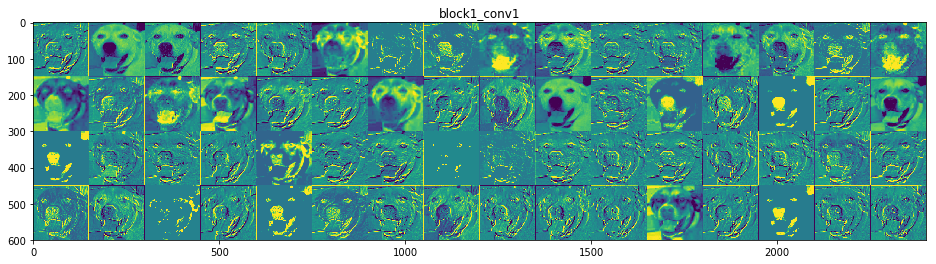

In [22]:
visualize_ConvLayer(1)

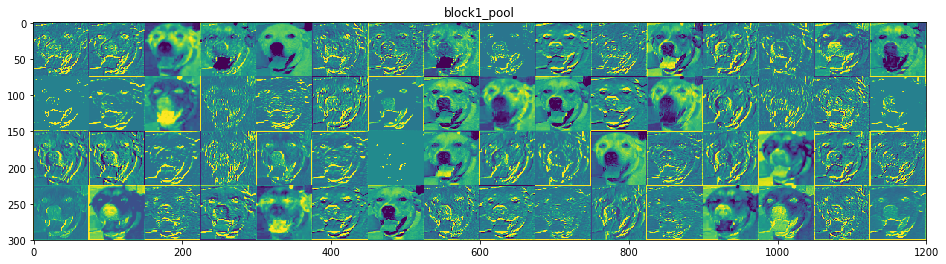

In [23]:
visualize_ConvLayer(3)

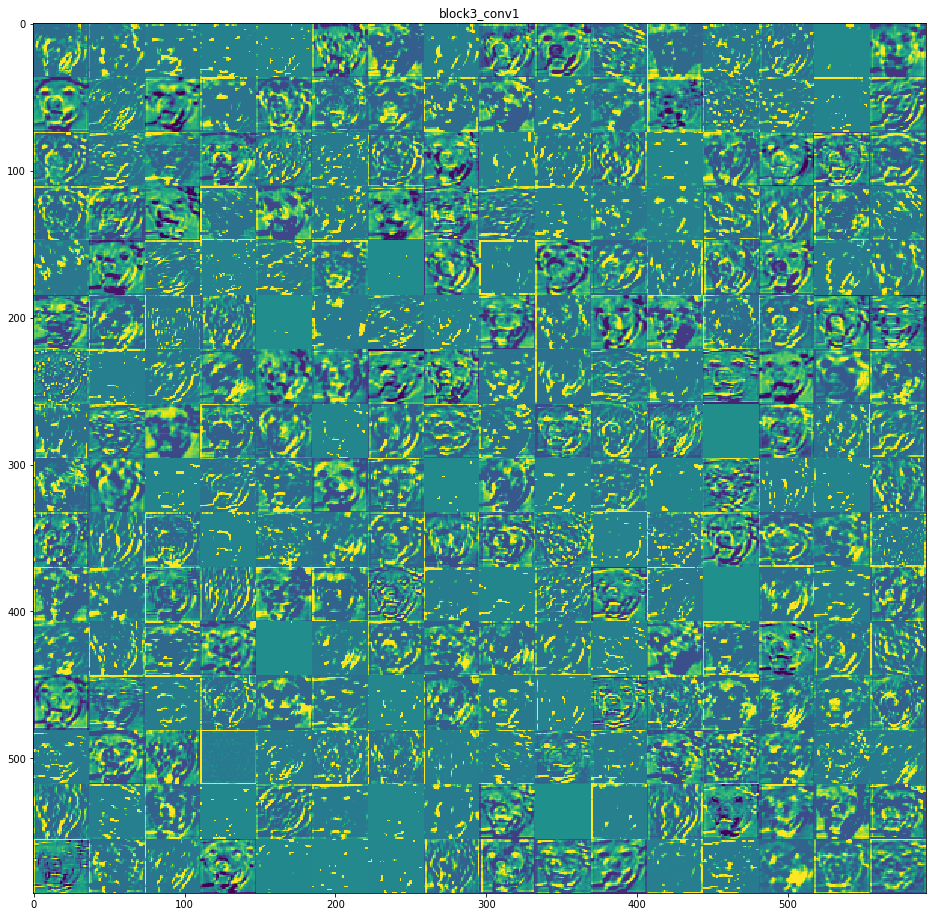

In [24]:
visualize_ConvLayer(7)

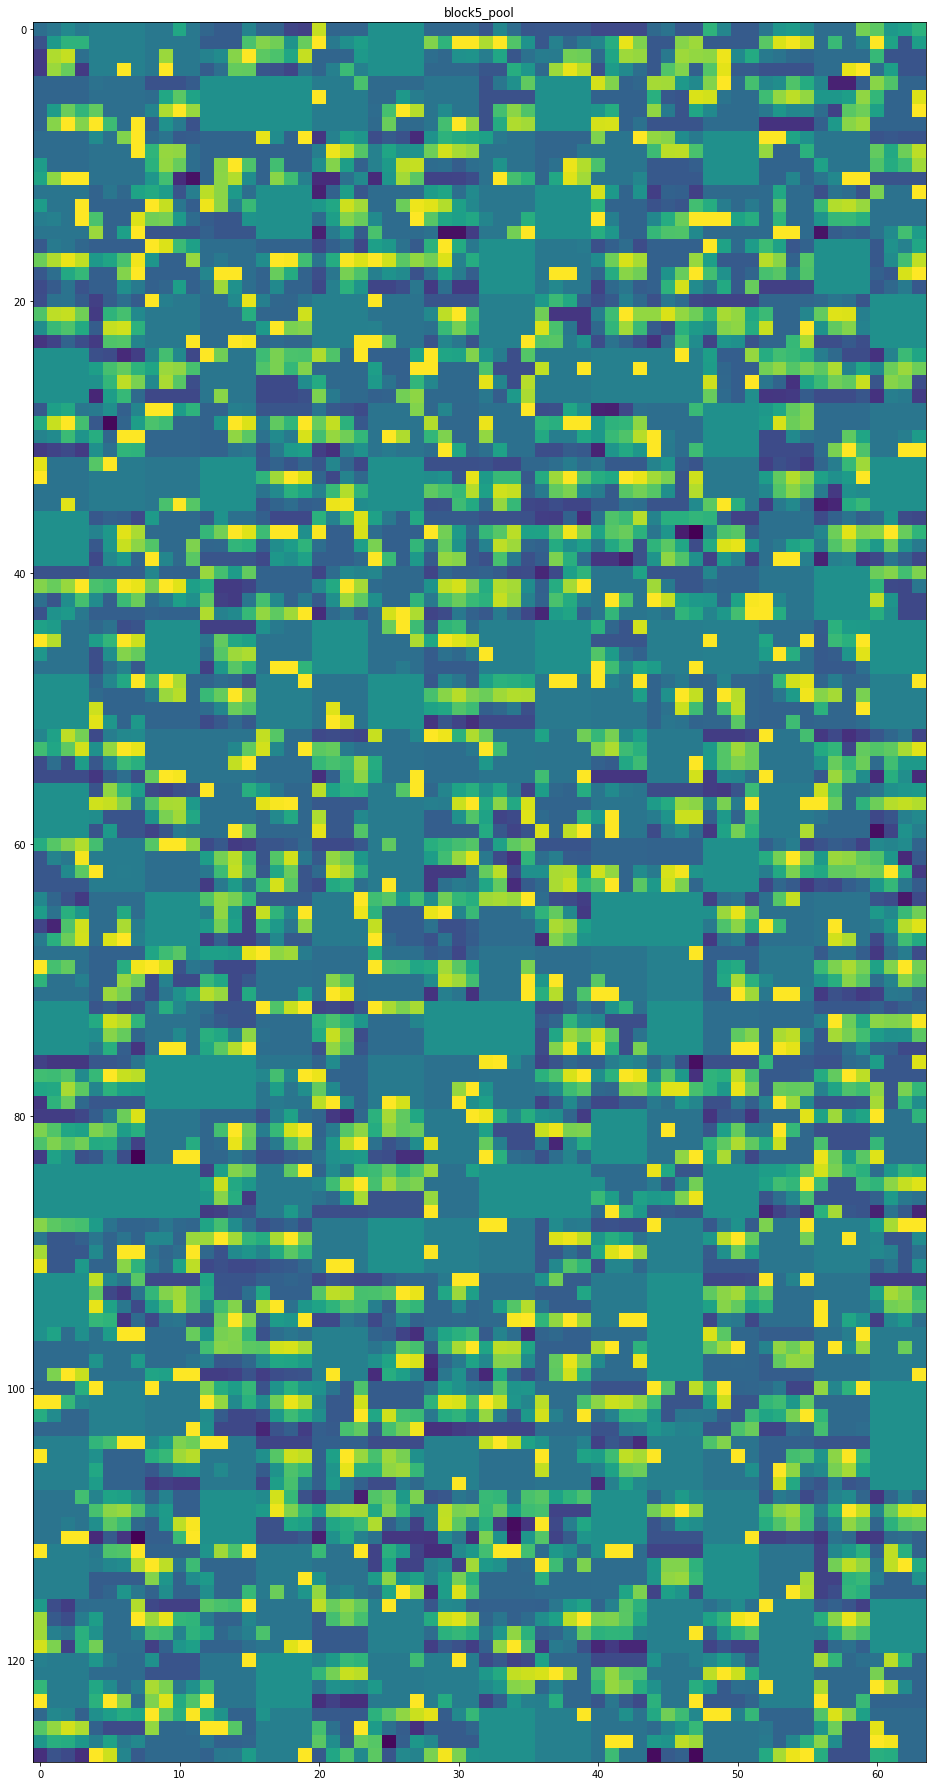

In [25]:
visualize_ConvLayer(21)

In [0]:
layer = model.get_layer('dense_1')
layer_output = layer.output

In [28]:
activation_model = models.Model(input=model.input, outputs=[layer_output])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("in...)`
  """Entry point for launching an IPython kernel.


In [29]:
validation_generator.reset()
activations = activation_model.predict_generator(validation_generator,steps=50,verbose=1)

50/50 [==============================] - 4s 78ms/step


In [0]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
import seaborn as sns

In [0]:
class_names = ['cat', 'dog']

def data_scatter(vecs, labels):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("husl", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(vecs[:, 0], vecs[:, 1], c=palette[labels])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')


    for idx in range(num_classes):

        # Place label at median position of vectors with corresponding label

        x_coord, y_coord = np.median(vecs[labels == idx, :], axis=0)
        txt = ax.text(x_coord, y_coord, class_names[idx], fontsize=16)
        # plot class index black with white contour
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=6, foreground="w"),
            PathEffects.Normal()])

In [36]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

tsne = TSNE(random_state=42).fit_transform(activations)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

t-SNE done! Time elapsed: 6.4699811935424805 seconds


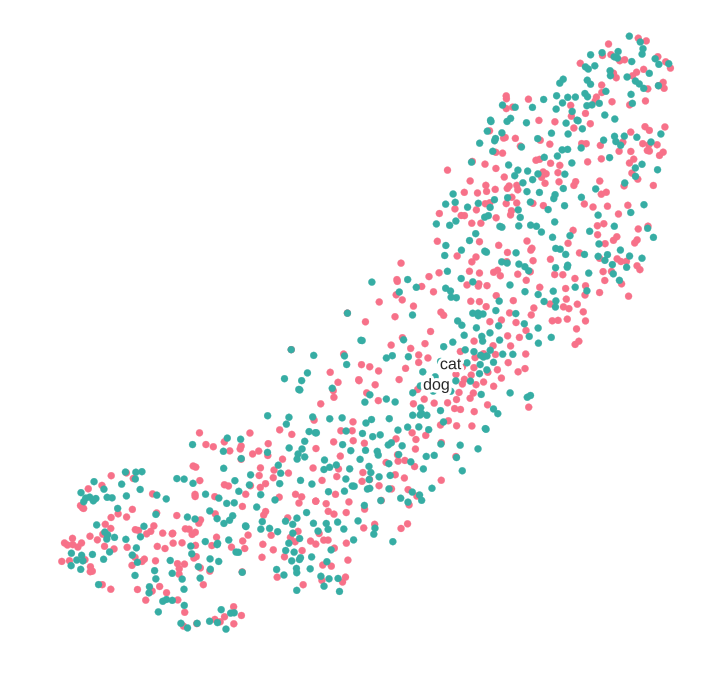

In [37]:
data_scatter(tsne, validation_generator.classes)